In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [14]:
cleaned_trained_df = pd.read_csv("data/train_csv_cleaned.csv")
test_df = pd.read_csv("data/test.csv")

display(cleaned_trained_df.head())
sampled_df = cleaned_trained_df.sample(n=500, random_state=42)  # adjust `n` as needed
cleaned_trained_df.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,previously_contacted,days_since_last_contact,had_previous_contact
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0,0,NaN,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0,0,NaN,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0,0,NaN,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0,0,NaN,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1,0,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      750000 non-null  int64  
 1   job                      750000 non-null  object 
 2   marital                  750000 non-null  object 
 3   education                750000 non-null  object 
 4   default                  750000 non-null  object 
 5   balance                  750000 non-null  int64  
 6   housing                  750000 non-null  object 
 7   loan                     750000 non-null  object 
 8   contact                  750000 non-null  object 
 9   day                      750000 non-null  int64  
 10  month                    750000 non-null  object 
 11  duration                 750000 non-null  int64  
 12  campaign                 750000 non-null  int64  
 13  pdays                    750000 non-null  int64  
 14  prev

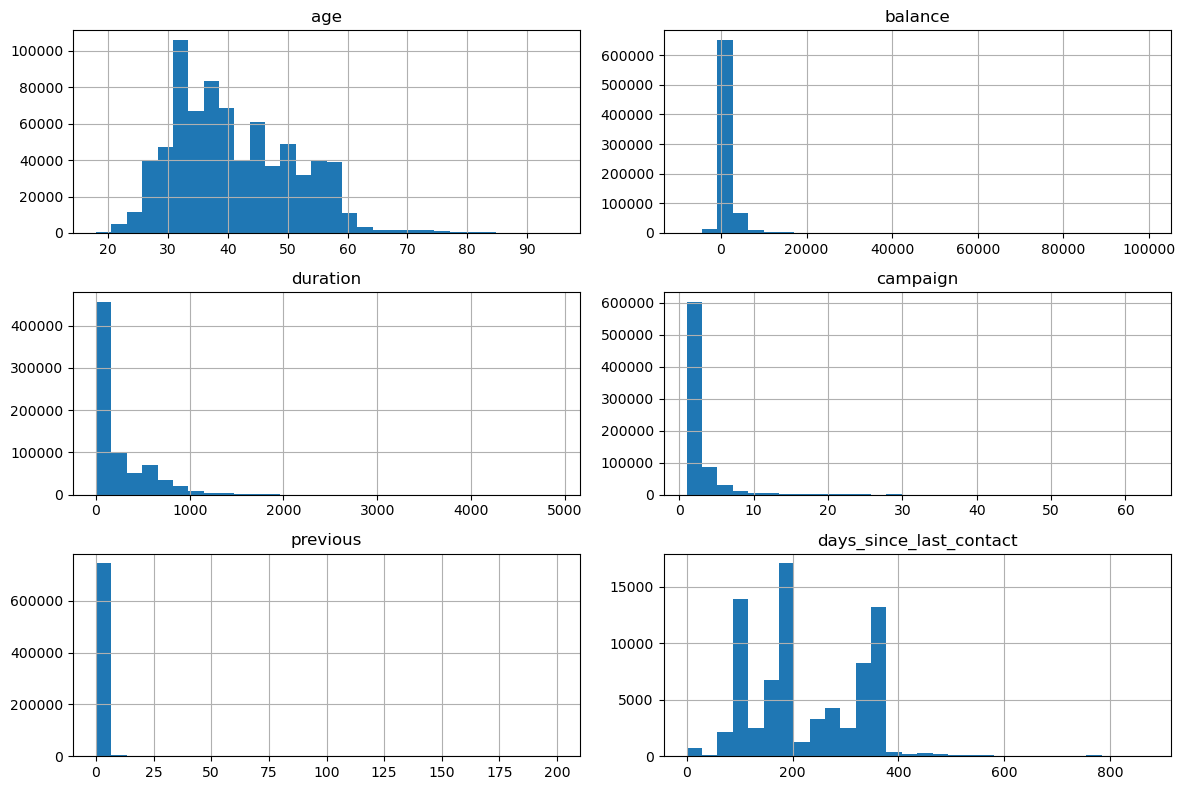

In [18]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'previous', 'days_since_last_contact']
cleaned_trained_df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

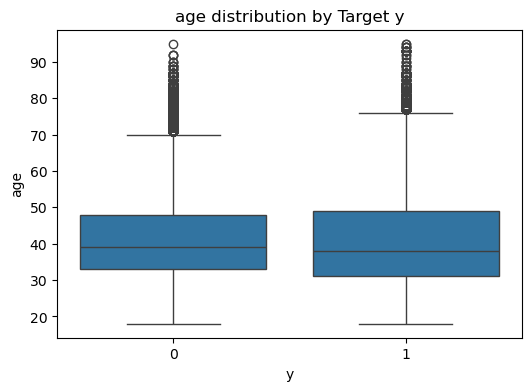

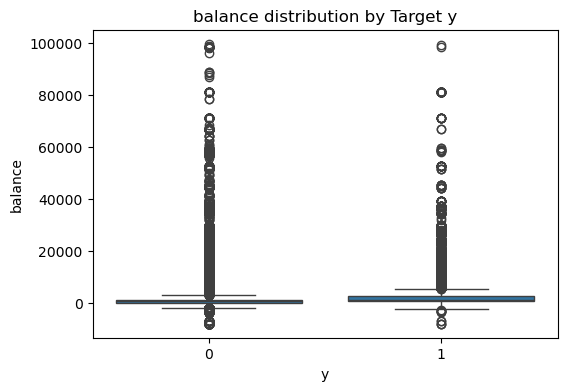

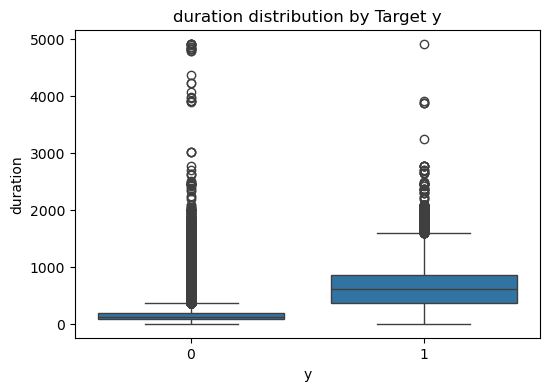

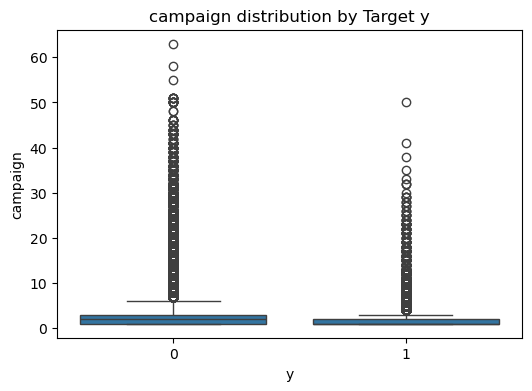

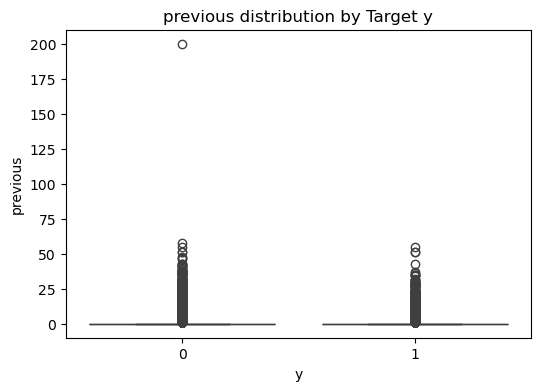

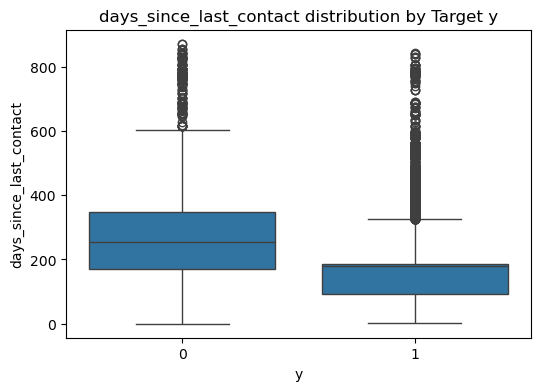

In [19]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='y', y=col, data=cleaned_trained_df)
    plt.title(f'{col} distribution by Target y')
    plt.show()

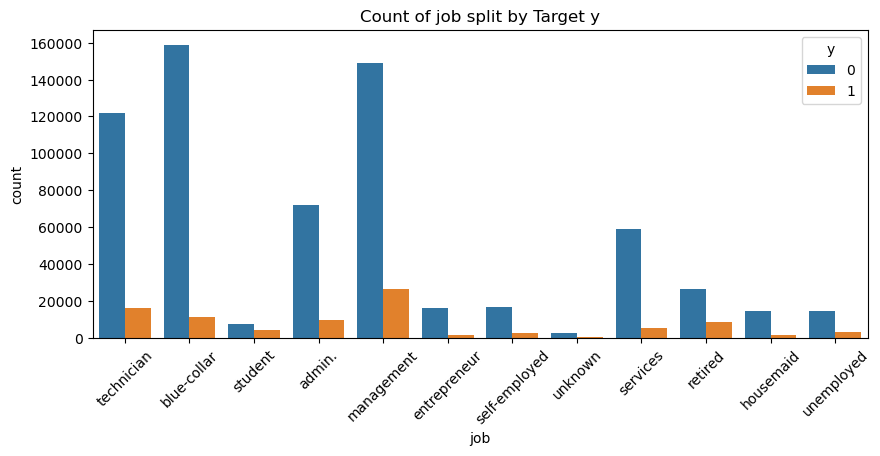

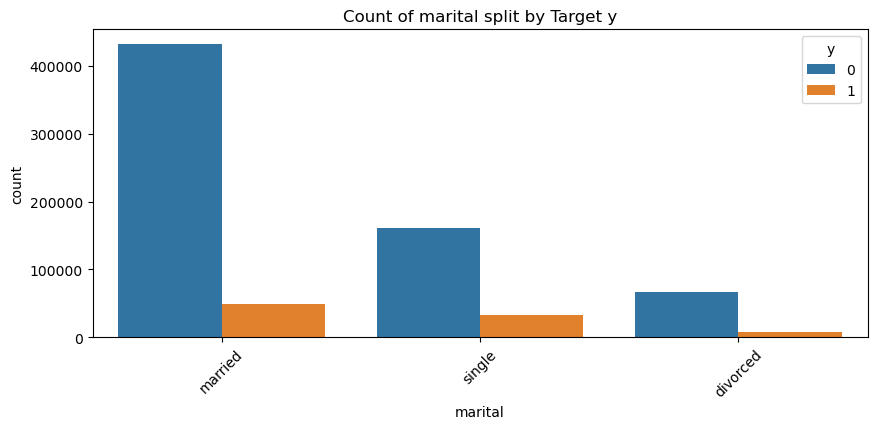

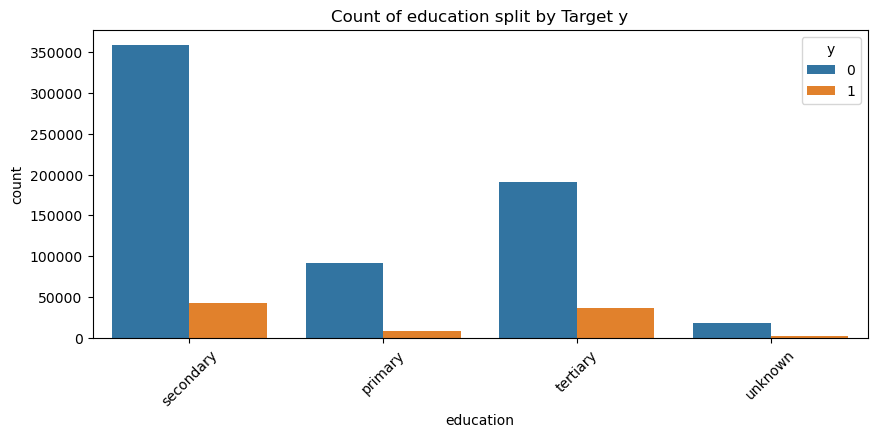

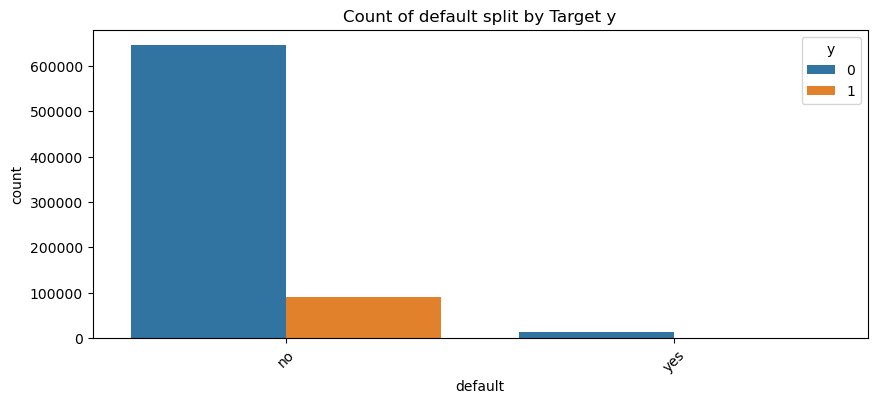

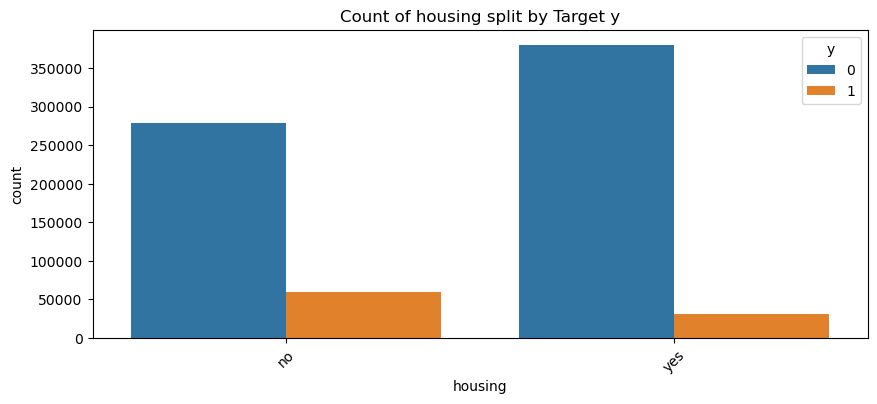

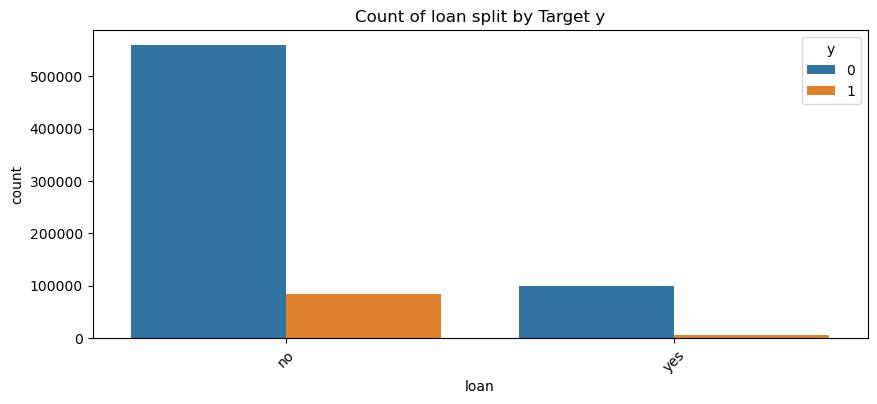

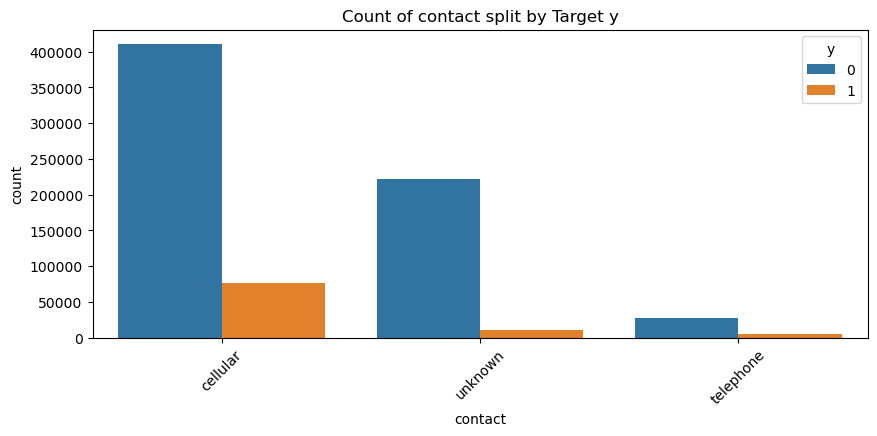

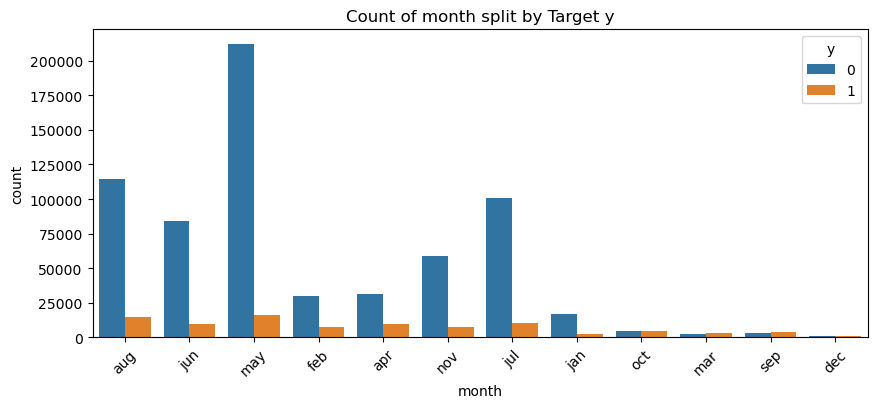

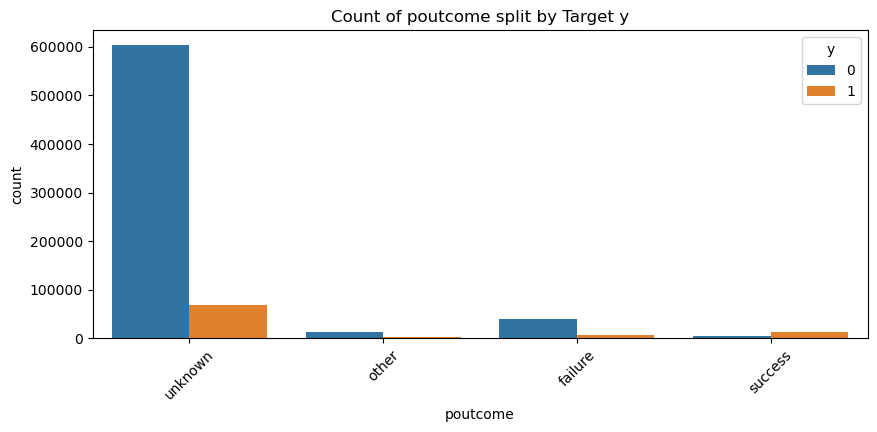

In [20]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=cleaned_trained_df, x=col, hue='y')
    plt.title(f'Count of {col} split by Target y')
    plt.xticks(rotation=45)
    plt.show()

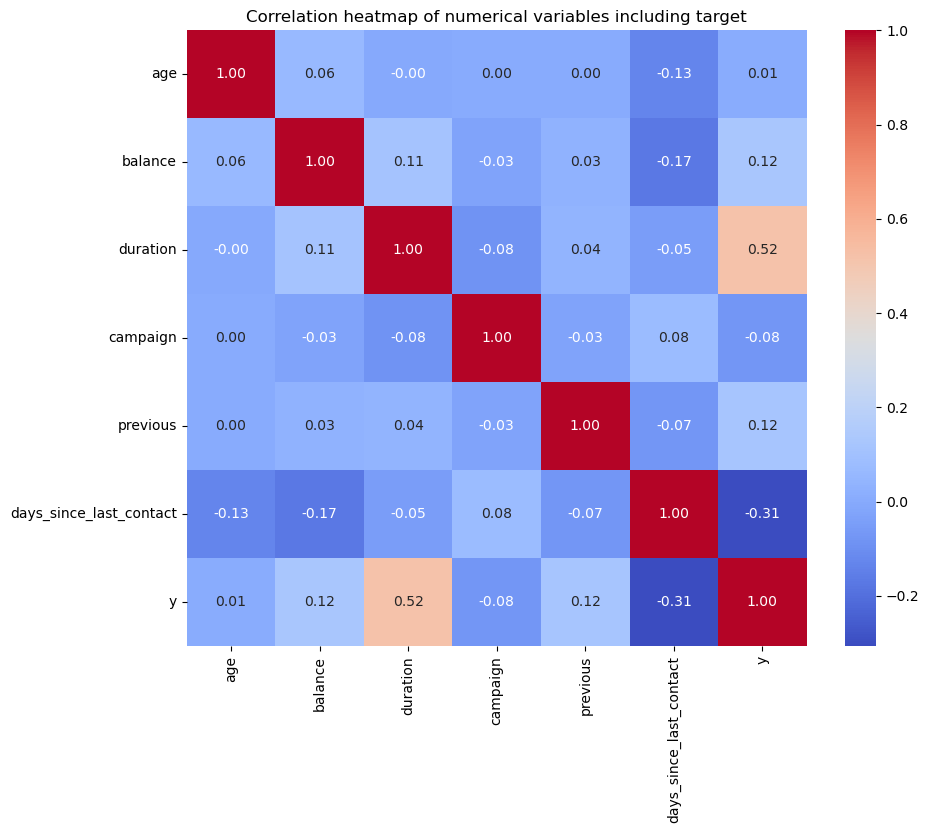

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(cleaned_trained_df[num_cols + ['y']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap of numerical variables including target')
plt.show()


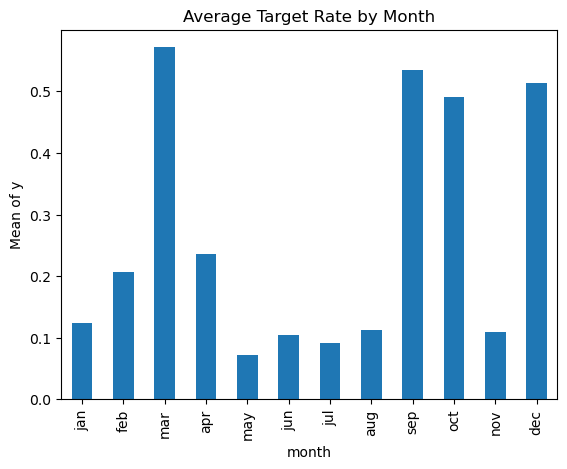

In [23]:
monthly_conversion = cleaned_trained_df.groupby('month')['y'].mean().reindex([
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
])

monthly_conversion.plot(kind='bar')
plt.title('Average Target Rate by Month')
plt.ylabel('Mean of y')
plt.show()

In [10]:
# Calculate correlation matrix
corr_matrix = cleaned_trained_df.select_dtypes(include='int64').corr()

# Show only the correlation of all columns with 'y', sorted by absolute value
target_corr = corr_matrix['y'].drop('y').sort_values(key=abs, ascending=False)

print(target_corr)

duration                0.519283
had_previous_contact    0.169502
previously_contacted    0.169470
balance                 0.122513
previous                0.119552
pdays                   0.089277
campaign               -0.075829
day                    -0.049625
age                     0.009523
Name: y, dtype: float64


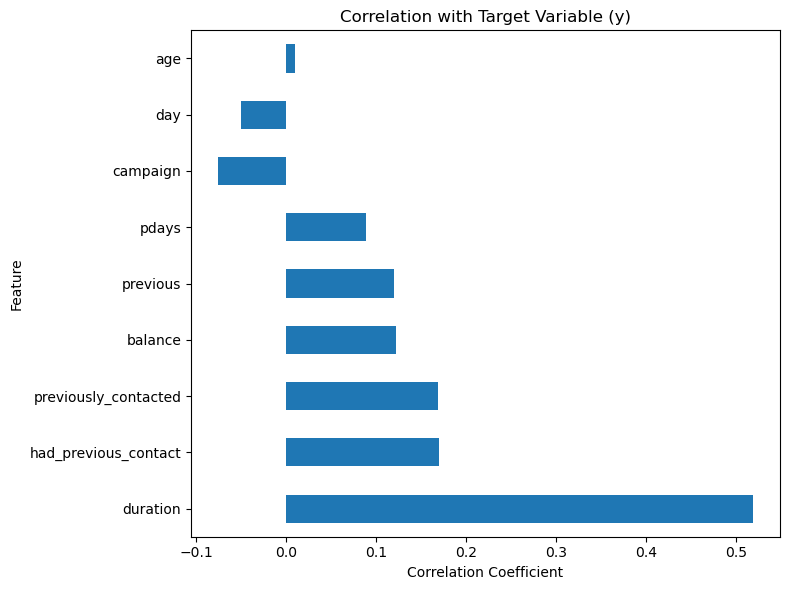

In [13]:
target_corr.plot(kind='barh', figsize=(8, 6))
plt.title('Correlation with Target Variable (y)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()